# Câu hỏi số 3: Thể loại phim và phân loại độ tuổi (MPA rating) ảnh hưởng ra sao đến đánh giá của giới phê bình và khán giả?

- **Mục tiêu**:
    - **Phát hiện "Sự lệch pha"** : Giới phê bình thường ưu ái các phim Chính kịch (Drama), Lịch sử (History) hoặc Nghệ thuật. Ngược lại, khán giả thường chấm điểm cao cho phim Hành động (Action), Viễn tưởng (Sci-Fi) vì tính giải trí. Hiểu được sự chênh lệch này giúp mô hình không bị "ngây thơ" khi gán trọng số giống nhau cho mọi thể loại.
    - **Xác định tác động của nhãn độ tuổi mpa**: Phim nhãn R (17+) thường được phép khai thác nội dung sâu sắc, gai góc hơn nên thường có điểm người dùng cao hơn phim PG-13 (thường bị cắt xén để bán vé đại trà).

- **Các bước thực hiện**: Nhóm thực hiện các bước thực nghiệm sau:
    - **Chuẩn hóa thang điểm**: Điểm chuyên gia (Metascore) thường thang 100, điểm người xem (User Rating) thang 10. Cần đưa về cùng một thang (chia Metascore cho 10) để so sánh trực quan.
    - **Xử lý cột Thể loại (Genre)**: Một phim thường có nhiều thể loại (vd: "Action, Adventure, Sci-Fi"). Cần kỹ thuật "Explode" (tách dòng) để một phim được tính cho cả 3 thể loại đó khi thống kê.
    - **Trực quan hóa**: Dùng biểu đồ cột ghép (Grouped Bar Chart) để so sánh song song điểm chuyên gia và khán giả trên từng thể loại, sử dụng biểu đồ hình hộp để so sánh sự phân phối điểm của người xem dựa trên các nhóm tuổi (mpa) khác nhau

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Đọc dữ liệu

In [ ]:
try:
    df = pd.read_csv('IMDB_movies.csv')
    
    # Chuẩn hóa tên cột (đề phòng lỗi khoảng trắng/viết hoa)
    #df.columns = df.columns.str.strip().str.lower()
    
    required_cols = ['genres', 'mpa', 'metascore', 'rating'] 
    
    # Lọc bỏ các dòng thiếu dữ liệu để vẽ cho đẹp
    #df_clean = df[required_cols].dropna().copy()
    
    # Đưa Metascore (0-100) về thang 10 để so sánh với User Rating
    df['metascore_norm'] = df['metascore'] / 10

    
    
except FileNotFoundError:
    print("Không tìm thấy file csv")
    

2. Xử lí cột genres

In [ ]:
df['genre_list'] = df['genres'].str.split(',')
df_exploded = df.explode('genre_list')
df_exploded['genre_clean'] = df_exploded['genre_list'].str.strip()
df_exploded = df_exploded[df_exploded['genre_clean'] != 'nan']
df_final = df_exploded[df_exploded['genre_clean'] != '']

3. vẽ biểu đồ

C:\Users\asecr\AppData\Local\Temp\ipykernel_7712\2873002506.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mpa, x='mpa', y='rating', order=common_mpa, palette="Set2", ax=axes[1])


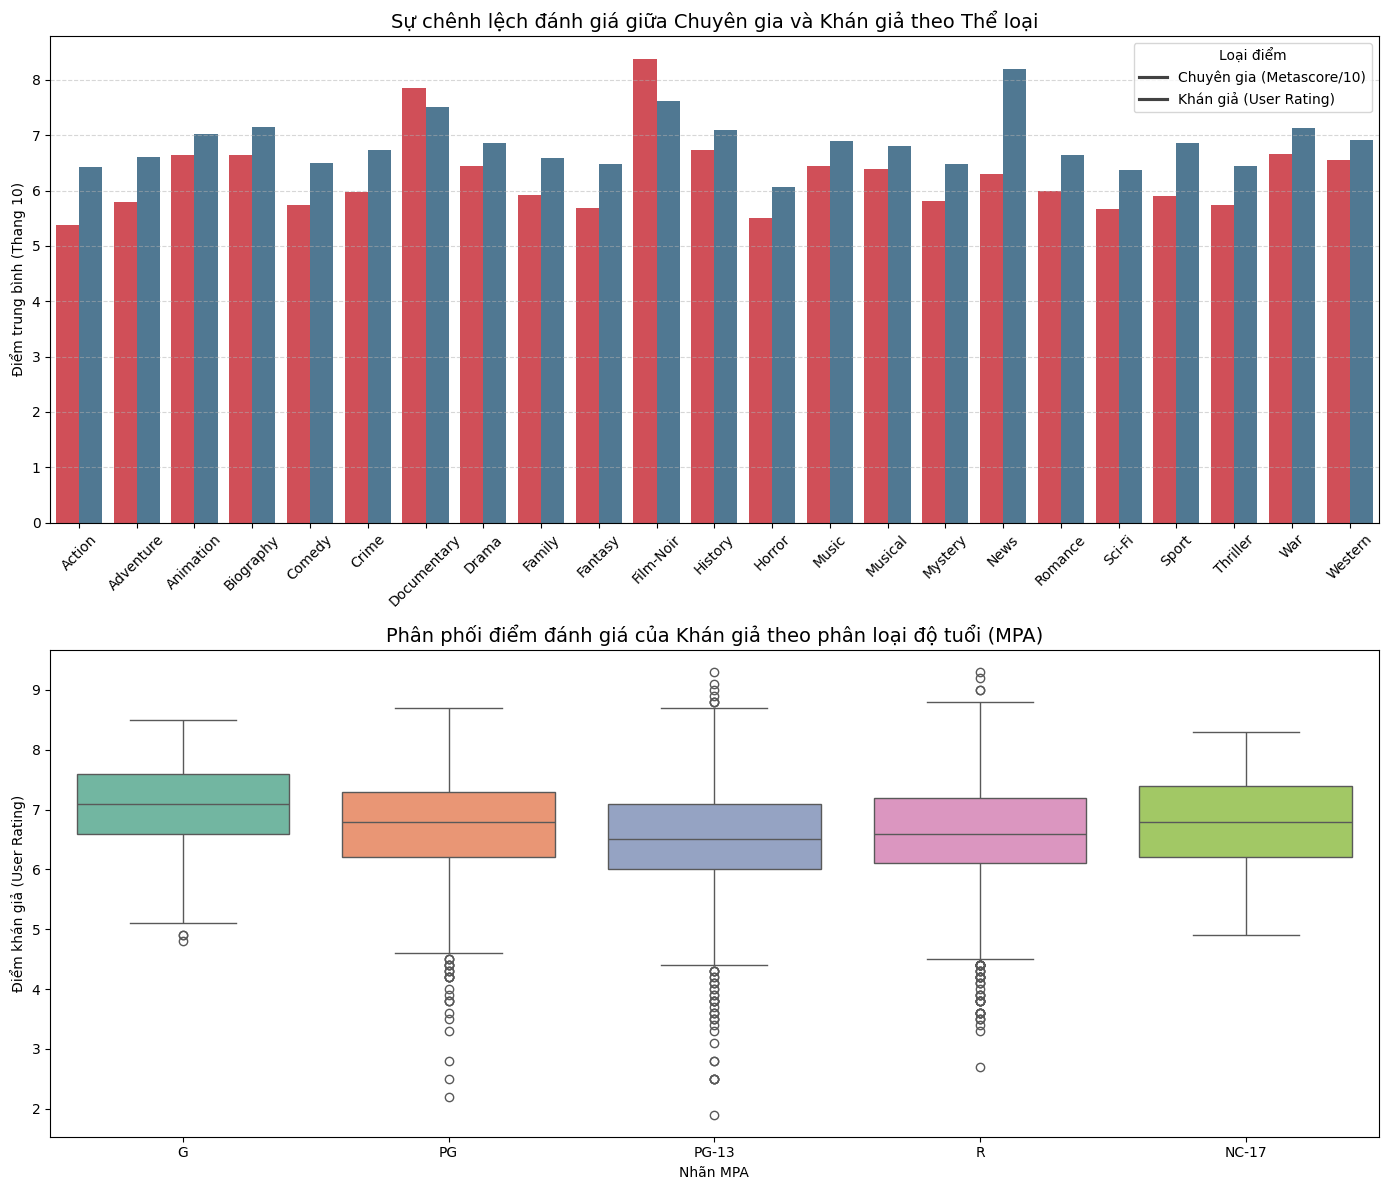

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))
#plt.figure(figsize=(25, 6))

genre_group = df_final.groupby('genre_clean')[['metascore_norm', 'rating']].mean().reset_index()
genre_melted = genre_group.melt(id_vars='genre_clean', var_name='Score Type', value_name='Average Score')

sns.barplot(data=genre_melted, x='genre_clean', y='Average Score', hue='Score Type', 
            palette={'metascore_norm': '#E63946', 'rating': '#457B9D'}, ax=axes[0])

axes[0].set_title('Sự chênh lệch đánh giá giữa Chuyên gia và Khán giả theo Thể loại', fontsize=14)
axes[0].set_ylabel('Điểm trung bình (Thang 10)')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Loại điểm', labels=['Chuyên gia (Metascore/10)', 'Khán giả (User Rating)'])
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

common_mpa = ['G', 'PG', 'PG-13', 'R', 'NC-17']
df_mpa = df[df['mpa'].isin(common_mpa)]

sns.boxplot(data=df_mpa, x='mpa', y='rating', order=common_mpa, palette="Set2", ax=axes[1])

axes[1].set_title('Phân phối điểm đánh giá của Khán giả theo phân loại độ tuổi (MPA)', fontsize=14)
axes[1].set_ylabel('Điểm khán giả (User Rating)')
axes[1].set_xlabel('Nhãn MPA')

plt.tight_layout()
plt.savefig('genre_mpa_analysis.png')
plt.show()

- **Biểu đồ 1:**
    - Phần lớn thể loại: Điểm trung bình của người xem cao hơn so với điểm chuyên gia => chuyên gia thường đánh giá khắt khe hơn so với người xem, đặc biệt ở các thể loại Action, Fantasy, Horror, ...
    - Một số thể loại như Biography, History, War, ... thường được các chuyên gia đánh giá cao hơn. Đặc biệt Documentary và Film-noir có điểm chuyên gia cao hơn điểm người xem. Những thể loại này thường được xem là khô khan với phần đông đại chúng
- **Biểu đồ 2:** Các bộ phim phù hợp mọi lứa tuổi (G), hoặc NC-17 có điểm trung vị cao hơn và ít outlier hơn so với các nhóm tuổi khác


- **Nhận xét:**
    - Điểm đánh giá của chuyên gia và người xem có sự khác nhau rõ rệt thông qua từng thể loại. Các thể loại phim tập trung vào thị hiếu người xem hiện đại như Action, Fantasy, Horror, ... thường chiếm cảm tình khán giả đại chúng, trong khi các bộ phim thiên về lịch sử, tài liệu (History, Documentary, Film noir, ...) với cốt truyện sâu sắc được đánh giá cao hơn bởi các chuyên gia
    - Điểm đánh giá của khán giả có sự khác nhau giữa các nhóm tuổi của phim: các phim phục vụ mọi lứa tuổi (G) thường có những câu chuyện gia đình, bài học cuộc sống; các phim NG-17 thường tập trung vào các câu chuyện tâm lý nhạy cảm nhưng sâu sắc; 2 nhóm tuổi trên có xu hướng được đánh giá cao hơn so với các nhóm tuổi còn lại.  